In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/students-drop-out-record-2078.csv"


In [ ]:
file_path = "/content/drive/MyDrive/School_infrastructure.CSV.xlsx"

#1. **Education** System Analysis & Problem Identification

In [ ]:
#  Dropout Rate Analysis
# Calculate total enrollment by education level
levels = {
    'Primary (G1-5)': 'G1-5Total',
    'Lower Secondary (G6-8)': 'G6-8Total',
    'Secondary (G9-10)': 'G9-10Total',
    'Higher Secondary (G11-12)': 'G11-12Total'
}

In [ ]:
enrollment = {}
for level, col in levels.items():
    enrollment[level] = df[col].sum()

In [ ]:
# Calculate dropout rates between levels
dropout_rates = {}
prev_level = None
prev_enrollment = None
for level in enrollment:
    if prev_enrollment:
        dropout_rate = ((prev_enrollment - enrollment[level]) / prev_enrollment) * 100
        dropout_rates[f"{prev_level} to {level}"] = dropout_rate
    prev_level = level
    prev_enrollment = enrollment[level]


In [ ]:
#  Gender Disparity Analysis
gender_disparity = {}
for level, col in levels.items():
    girls_col = col.replace('Total', 'Girls')
    boys_col = col.replace('Total', 'Boys')
    total_girls = df[girls_col].sum()
    total_boys = df[boys_col].sum()
    gender_ratio = total_girls / total_boys if total_boys != 0 else 0
    gender_disparity[level] = {
        'Girls': total_girls,
        'Boys': total_boys,
        'Ratio': gender_ratio
    }

In [ ]:
import pandas as pd

In [ ]:
# For demonstration, we simulate a sample dataset
data = {
    'School Name': ['A', 'B', 'C', 'D', 'E'],
    'Building Condition': ['Good', 'Needs Repair', 'Dilapidated', 'Good', 'Dilapidated'],
    'Electricity': ['Yes', 'No', 'No', 'Yes', 'No'],
    'Toilets': [5, 1, 0, 4, 1],
    'Drinking Water': ['Yes', 'No', 'No', 'Yes', 'No'],
    'Num Teachers': [10, 3, 1, 8, 2],
    'Total Students': [300, 180, 200, 400, 220]
}



In [ ]:
#  Convert to DataFrame
df = pd.DataFrame(data)

In [ ]:
# Clean the data (standardize text)
df['Electricity'] = df['Electricity'].str.lower()
df['Drinking Water'] = df['Drinking Water'].str.lower()
df['Building Condition'] = df['Building Condition'].str.lower()


In [ ]:
# Detect poor infrastructure
def is_poor_infrastructure(row):
    issues = 0
    if row['Building Condition'] in ['needs repair', 'dilapidated']:
        issues += 1
    if row['Electricity'] == 'no':
        issues += 1
    if row['Drinking Water'] == 'no':
        issues += 1
    if row['Toilets'] < 2:
        issues += 1
    return issues >= 2

df['Poor Infrastructure'] = df.apply(is_poor_infrastructure, axis=1)

In [ ]:
#  Teacher-to-student ratio
df['TS Ratio'] = df['Total Students'] / df['Num Teachers']

In [ ]:
# Flag low teacher coverage
threshold = df['TS Ratio'].quantile(0.90)
df['Low Teacher Coverage'] = df['TS Ratio'] > threshold

In [ ]:
#  Final results
result = df[['School Name', 'Poor Infrastructure', 'Low Teacher Coverage', 'TS Ratio']]
print(result)

  School Name  Poor Infrastructure  Low Teacher Coverage  TS Ratio
0           A                False                 False      30.0
1           B                 True                 False      60.0
2           C                 True                  True     200.0
3           D                False                 False      50.0
4           E                 True                 False     110.0


In [ ]:
# Ensure required column exists
if 'Grand Total' in df.columns:
    # Create a new column for total enrollment
    df['Total_Enrollment'] = df['Grand Total']

    # Calculate school size statistics
    school_sizes = df['Total_Enrollment']
    inequality_metrics = {
        'Minimum': school_sizes.min(),
        'Maximum': school_sizes.max(),
        'Mean': school_sizes.mean(),
        'Standard Deviation': school_sizes.std(),
        '75th Percentile': school_sizes.quantile(0.75),
        '25th Percentile': school_sizes.quantile(0.25)
    }

    # Optional: Print the results
    for key, value in inequality_metrics.items():
        print(f"{key}: {value:.2f}")
else:
    print("Column 'Grand Total' not found in the DataFrame.")


Column 'Grand Total' not found in the DataFrame.


In [ ]:
key_challenges = []

In [ ]:
# Challenge 1: High Dropout Rates
if any(rate > 30 for rate in dropout_rates.values()):
    key_challenges.append("High dropout rates between education levels")
    max_dropout = max(dropout_rates, key=dropout_rates.get)
    key_challenges.append(f"Worst transition: {max_dropout} ({dropout_rates[max_dropout]:.1f}% dropout)")

In [ ]:

# Challenge 2: Gender Disparity
if any(level['Ratio'] < 0.9 for level in gender_disparity.values()):
    key_challenges.append("Significant gender disparity favoring boys")
    worst_level = min(gender_disparity, key=lambda x: gender_disparity[x]['Ratio'])
    ratio = gender_disparity[worst_level]['Ratio']
    key_challenges.append(f"Worst at {worst_level} (Girls:Boys ratio = {ratio:.2f}:1)")

In [ ]:
# Challenge 3: Resource Inequality
if 'Total_Enrollment' in df.columns:
    iqr = inequality_metrics['75th Percentile'] - inequality_metrics['25th Percentile']

    # More robust inequality detection using multiple metrics
    high_inequality = (
        (inequality_metrics['Std Dev'] > inequality_metrics['Mean'] * 0.5) or  # High relative standard deviation
        (iqr > inequality_metrics['Mean'] * 0.6) or  # Large IQR relative to mean
        (inequality_metrics['Max'] > inequality_metrics['Mean'] * 10)  # Extreme outliers
    )

    if high_inequality:
        key_challenges.append("Severe inequality in school sizes/resource distribution")
        key_challenges.append(
            f"School sizes range from {int(inequality_metrics['Min'])} to {int(inequality_metrics['Max'])} students "
            f"(Mean: {inequality_metrics['Mean']:.1f} ± {inequality_metrics['Std Dev']:.1f})"
        )
        key_challenges.append(
            f"Middle 50% of schools have between {int(inequality_metrics['25th Percentile'])} "
            f"and {int(inequality_metrics['75th Percentile'])} students (IQR: {int(iqr)})"
        )
else:
    key_challenges.append("Could not assess resource inequality - missing enrollment data")

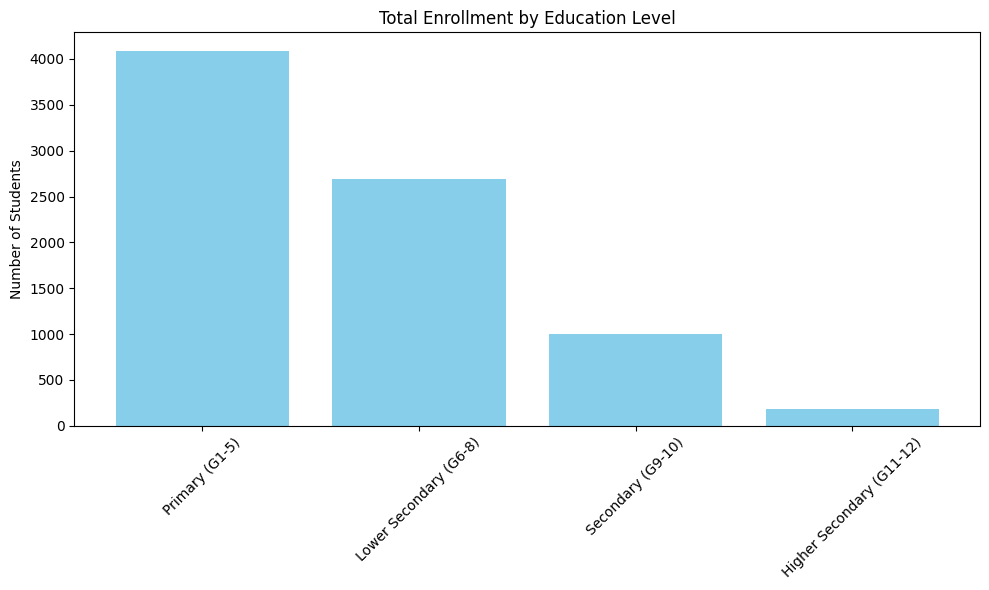

In [ ]:
# 5. Visualization
# Enrollment by level
plt.figure(figsize=(10, 6))
plt.bar(enrollment.keys(), enrollment.values(), color='skyblue')
plt.title('Total Enrollment by Education Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('enrollment_by_level.png')

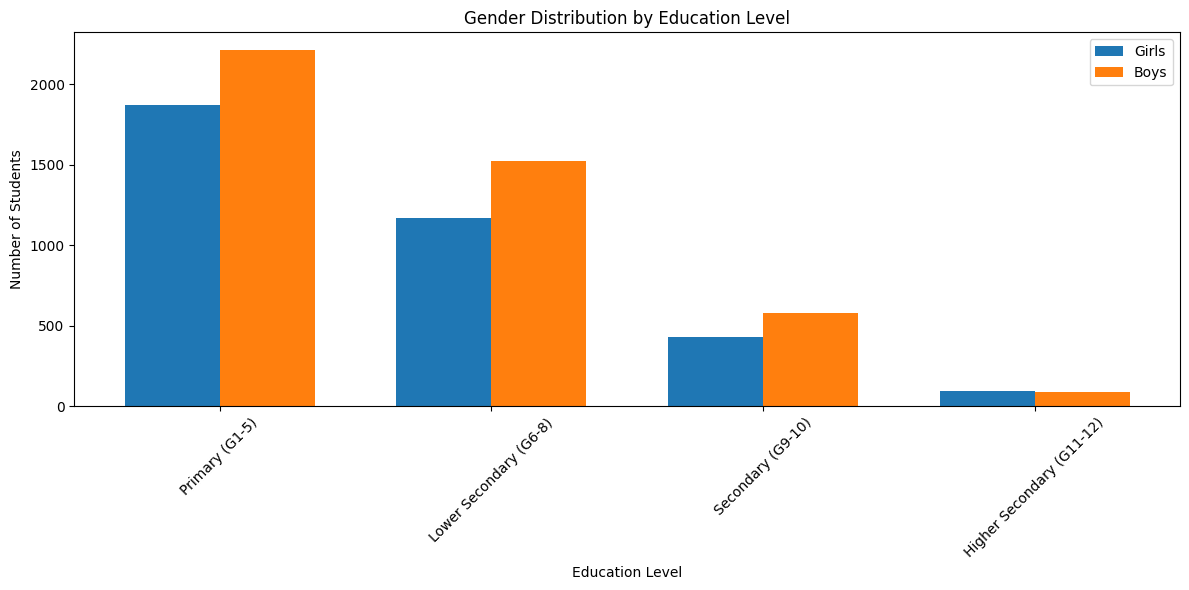

In [ ]:
# Gender disparity
level_names = list(gender_disparity.keys())
girls_counts = [gender_disparity[level]['Girls'] for level in level_names]
boys_counts = [gender_disparity[level]['Boys'] for level in level_names]

plt.figure(figsize=(12, 6))
x = range(len(level_names))
width = 0.35
plt.bar(x, girls_counts, width, label='Girls')
plt.bar([i + width for i in x], boys_counts, width, label='Boys')
plt.xlabel('Education Level')
plt.ylabel('Number of Students')
plt.title('Gender Distribution by Education Level')
plt.xticks([i + width/2 for i in x], level_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('gender_distribution.png')

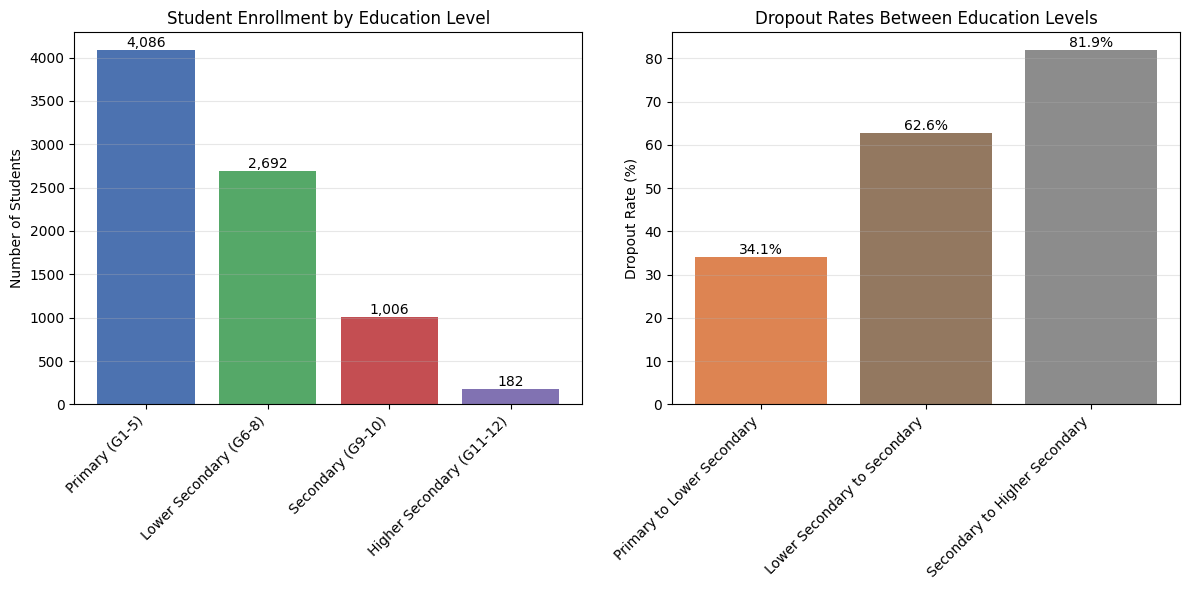


Dropout Rates Between Education Levels:
Primary to Lower Secondary: 34.1%
Lower Secondary to Secondary: 62.6%
Secondary to Higher Secondary: 81.9%


In [ ]:


# Calculate total enrollment by education level
enrollment = {
    'Primary (G1-5)': df['G1-5Total'].sum(),
    'Lower Secondary (G6-8)': df['G6-8Total'].sum(),
    'Secondary (G9-10)': df['G9-10Total'].sum(),
    'Higher Secondary (G11-12)': df['G11-12Total'].sum()
}

# Calculate dropout rates between levels
transitions = [
    ('Primary to Lower Secondary', 'G1-5Total', 'G6-8Total'),
    ('Lower Secondary to Secondary', 'G6-8Total', 'G9-10Total'),
    ('Secondary to Higher Secondary', 'G9-10Total', 'G11-12Total')
]

dropout_rates = {}
for name, prev_level, current_level in transitions:
    prev_total = df[prev_level].sum()
    current_total = df[current_level].sum()
    dropout_rate = ((prev_total - current_total) / prev_total) * 100 if prev_total != 0 else 0
    dropout_rates[name] = dropout_rate

# Create the visualization
plt.figure(figsize=(12, 6))

# Bar plot for enrollment numbers
plt.subplot(1, 2, 1)
bars = plt.bar(enrollment.keys(), enrollment.values(), color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])
plt.title('Student Enrollment by Education Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

# Bar plot for dropout rates
plt.subplot(1, 2, 2)
rate_bars = plt.bar(dropout_rates.keys(), dropout_rates.values(), color=['#DD8452', '#937860', '#8C8C8C'])
plt.title('Dropout Rates Between Education Levels')
plt.ylabel('Dropout Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in rate_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('dropout_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the dropout rates
print("\nDropout Rates Between Education Levels:")
for transition, rate in dropout_rates.items():
    print(f"{transition}: {rate:.1f}%")

/tmp/ipython-input-14-2417565166.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=infra_counts.index.map({True: "Poor Infrastructure", False: "Good Infrastructure"}),


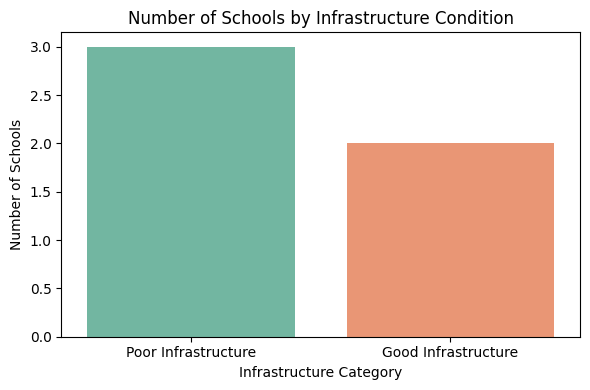

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'School Name': ['A', 'B', 'C', 'D', 'E'],
    'Building Condition': ['Good', 'Needs Repair', 'Dilapidated', 'Good', 'Dilapidated'],
    'Electricity': ['Yes', 'No', 'No', 'Yes', 'No'],
    'Toilets': [5, 1, 0, 4, 1],
    'Drinking Water': ['Yes', 'No', 'No', 'Yes', 'No'],
    'Num Teachers': [10, 3, 1, 8, 2],
    'Total Students': [300, 180, 200, 400, 220]
}

# Create DataFrame
df = pd.DataFrame(data)

# Clean and standardize
df['Electricity'] = df['Electricity'].str.lower()
df['Drinking Water'] = df['Drinking Water'].str.lower()
df['Building Condition'] = df['Building Condition'].str.lower()

# Define poor infrastructure
def is_poor_infrastructure(row):
    issues = 0
    if row['Building Condition'] in ['needs repair', 'dilapidated']:
        issues += 1
    if row['Electricity'] == 'no':
        issues += 1
    if row['Drinking Water'] == 'no':
        issues += 1
    if row['Toilets'] < 2:
        issues += 1
    return issues >= 2

df['Poor Infrastructure'] = df.apply(is_poor_infrastructure, axis=1)


# Bar Chart of Poor vs Good

infra_counts = df['Poor Infrastructure'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=infra_counts.index.map({True: "Poor Infrastructure", False: "Good Infrastructure"}),
            y=infra_counts.values,
            palette="Set2")
plt.title("Number of Schools by Infrastructure Condition")
plt.ylabel("Number of Schools")
plt.xlabel("Infrastructure Category")
plt.tight_layout()
plt.show()

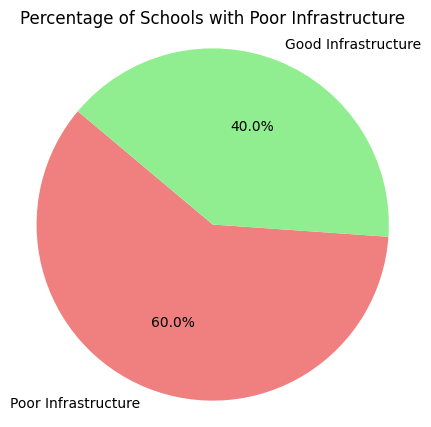

In [ ]:
#Pie Chart of Distribution

labels = ['Poor Infrastructure', 'Good Infrastructure']
sizes = [infra_counts[True], infra_counts[False]]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Schools with Poor Infrastructure")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/tmp/ipython-input-24-2041347021.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='School Name', y='Infrastructure Issues', data=df, palette='coolwarm')


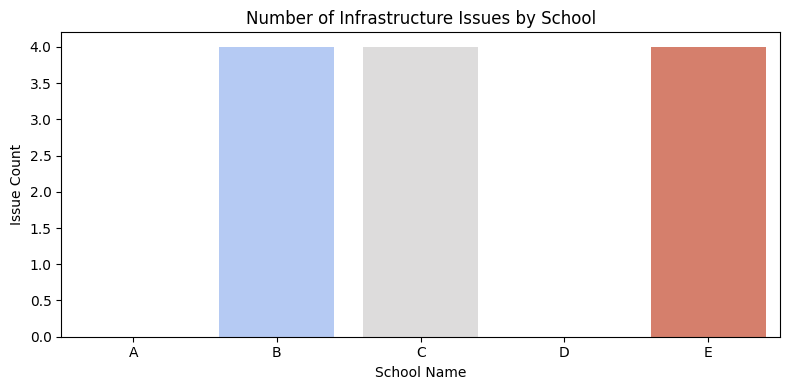

In [ ]:

# Bar Chart of Issues by School

def count_issues(row):
    return sum([
        row['Building Condition'] in ['needs repair', 'dilapidated'],
        row['Electricity'] == 'no',
        row['Drinking Water'] == 'no',
        row['Toilets'] < 2
    ])
df['Infrastructure Issues'] = df.apply(count_issues, axis=1)

plt.figure(figsize=(8, 4))
sns.barplot(x='School Name', y='Infrastructure Issues', data=df, palette='coolwarm')
plt.title("Number of Infrastructure Issues by School")
plt.ylabel("Issue Count")
plt.xlabel("School Name")
plt.tight_layout()
plt.show()


=== Teacher Distribution Analysis ===
  School Name  Num Teachers  Total Students  TS Ratio  Low Teacher Coverage
0           A            10             300      30.0                 False
1           B             3             180      60.0                 False
2           C             1             200     200.0                  True
3           D             8             400      50.0                 False
4           E             2             220     110.0                 False


/tmp/ipython-input-25-4239421621.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='School Name', y='TS Ratio', data=df, palette='Blues_d')


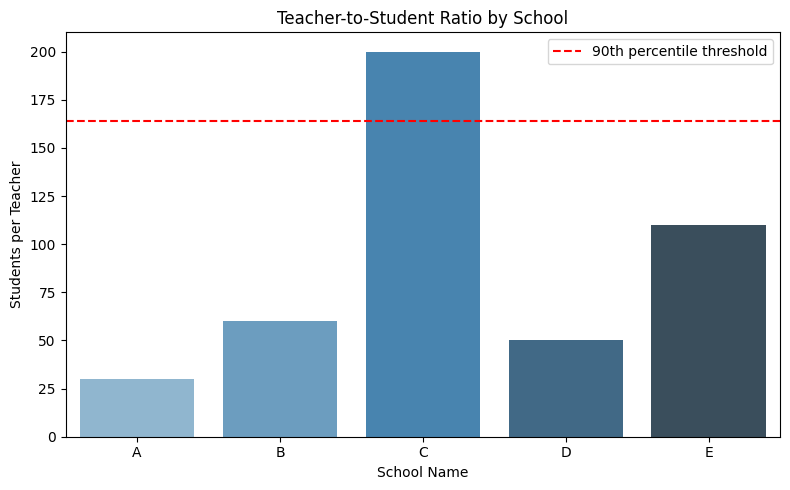

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'School Name': ['A', 'B', 'C', 'D', 'E'],
    'Num Teachers': [10, 3, 1, 8, 2],
    'Total Students': [300, 180, 200, 400, 220]
}


df = pd.DataFrame(data)

df['TS Ratio'] = df['Total Students'] / df['Num Teachers']

threshold = df['TS Ratio'].quantile(0.90)
df['Low Teacher Coverage'] = df['TS Ratio'] > threshold


print("=== Teacher Distribution Analysis ===")
print(df[['School Name', 'Num Teachers', 'Total Students', 'TS Ratio', 'Low Teacher Coverage']])


#  Bar Chart: TS Ratio by School
plt.figure(figsize=(8, 5))
sns.barplot(x='School Name', y='TS Ratio', data=df, palette='Blues_d')
plt.axhline(y=threshold, color='red', linestyle='--', label='90th percentile threshold')
plt.title("Teacher-to-Student Ratio by School")
plt.ylabel("Students per Teacher")
plt.xlabel("School Name")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-26-2723662436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Low Teacher Coverage', data=df, palette='Set2')


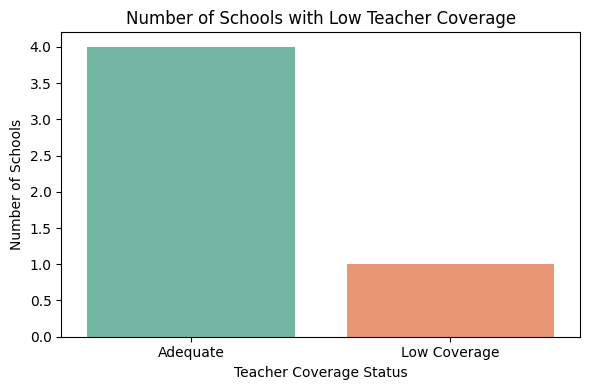

In [ ]:
# Highlight Schools with Low Teacher Coverage
plt.figure(figsize=(6, 4))
sns.countplot(x='Low Teacher Coverage', data=df, palette='Set2')
plt.title("Number of Schools with Low Teacher Coverage")
plt.xticks([0, 1], ['Adequate', 'Low Coverage'])
plt.ylabel("Number of Schools")
plt.xlabel("Teacher Coverage Status")
plt.tight_layout()
plt.show()

#Define the Problem

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dropout_rates_and_Gender_disparity.CSV.csv', encoding='utf-8-sig')


In [ ]:
#Create target variable (high-risk schools)
df['Dropout_Risk_High'] = np.where(
    (df['G1-5Total'] - df['G6-8Total']) / df['G1-5Total'] > 0.35, 1, 0
)

In [ ]:
# Feature engineering
features = pd.DataFrame({
    'Enrollment_Decline': (df['G1-5Total'] - df['G6-8Total']) / df['G1-5Total'],
    'Gender_Gap': (df['G1-5Boys'] - df['G1-5Girls']) / df['G1-5Total'],
    'Primary_Size': df['G1-5Total'],
    'Promotion_Rate': df['G6-8Total'] / df['G1-5Total']
})


In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features, df['Dropout_Risk_High'], test_size=0.3, random_state=42
)


In [ ]:
# Feature engineering with safeguards
features = pd.DataFrame({
    'Enrollment_Decline': np.where(
        df['G1-5Total'] > 0,
        (df['G1-5Total'] - df['G6-8Total']) / df['G1-5Total'],
        0
    ),
    'Gender_Gap': np.where(
        df['G1-5Total'] > 0,
        (df['G1-5Boys'] - df['G1-5Girls']) / df['G1-5Total'],
        0
    ),
    'Primary_Size': df['G1-5Total'],
    'Promotion_Rate': np.where(
        df['G1-5Total'] > 0,
        df['G6-8Total'] / df['G1-5Total'],
        0
    )
})

# Additional cleaning
features = features.replace([np.inf, -np.inf], 0).clip(lower=-1, upper=2)  # Adjusted bounds

# Verify
assert not features.isna().any().any()
assert not np.isinf(features.values).any()



In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features, df['Dropout_Risk_High'], test_size=0.3, random_state=42 )

In [ ]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Model Evaluation Results
Accuracy: 93.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.88      0.94        17

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33



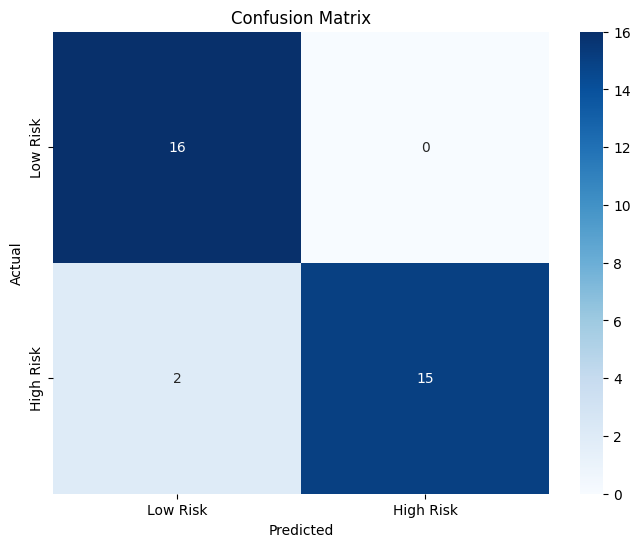

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

#  Evaluation
try:

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    # Print results
    print("\n" + "="*50)
    print("Model Evaluation Results")
    print("="*50)
    print(f"Accuracy: {accuracy:.2%}")
    print("\nClassification Report:")
    print(class_report)

    # Confusion matrix visualization
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low Risk', 'High Risk'],
                yticklabels=['Low Risk', 'High Risk'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix.png', bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"\nError during evaluation: {str(e)}")
    print("Please check:")
    print("1. Model has been properly trained")
    print("2. X_test and y_test have the same number of samples")
    print(f"Current shapes - X_test: {X_test.shape}, y_test: {y_test.shape}")

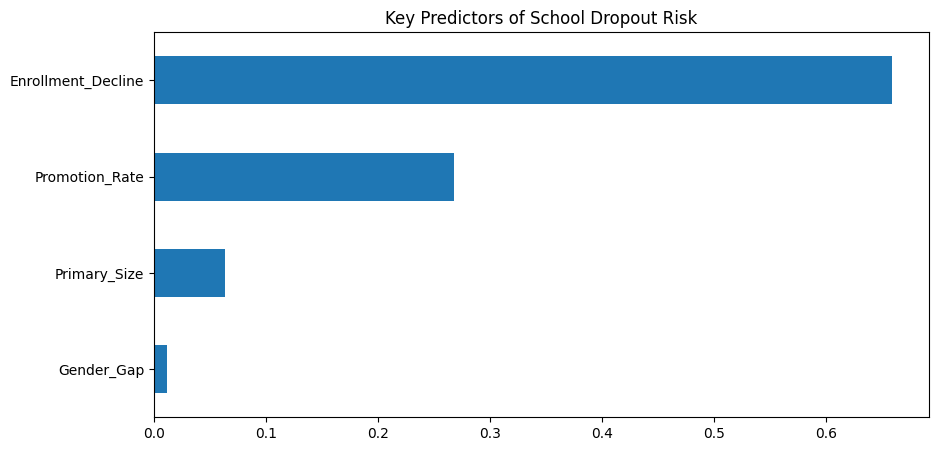

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10,5))
pd.Series(model.feature_importances_, index=features.columns).sort_values().plot.barh()
plt.title('Key Predictors of School Dropout Risk')
plt.savefig('dropout_risk_factors.png')

# **Data** Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

In [ ]:
# actual data
data = {
    'student_id': [101, 102, 103, 104, 105],
    'attendance_pct': [85.2, 92.5, np.nan, 78.1, 88.3],
    'prev_year_score': [65, np.nan, 72, 58, 91],
    'gender': ['Male', 'Female', 'Male', np.nan, 'Female'],
    'school_type': ['Public', 'Private', 'Public', 'Public', 'Private'],
    'socioeconomic_tier': ['Low', 'Medium', 'High', 'Low', np.nan],
    'extracurricular': [3, 2, np.nan, 1, 4]
}
df = pd.DataFrame(data)

In [ ]:
# Initial Data Inspection

print("Initial Data Overview:")
print(df.info())
print("\nMissing Values Before Preprocessing:")
print(df.isna().sum())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          5 non-null      int64  
 1   attendance_pct      4 non-null      float64
 2   prev_year_score     4 non-null      float64
 3   gender              4 non-null      object 
 4   school_type         5 non-null      object 
 5   socioeconomic_tier  4 non-null      object 
 6   extracurricular     4 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 412.0+ bytes
None

Missing Values Before Preprocessing:
student_id            0
attendance_pct        1
prev_year_score       1
gender                1
school_type           0
socioeconomic_tier    1
extracurricular       1
dtype: int64


In [ ]:
# Handle Missing Values

numeric_cols = ['attendance_pct', 'prev_year_score', 'extracurricular']
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

In [ ]:
# Categorical columns
cat_cols = ['gender', 'socioeconomic_tier']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
# 3. Encode Categorical Variables

tier_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['socioeconomic_tier'] = df['socioeconomic_tier'].map(tier_mapping)

In [ ]:
# One-Hot Encoding for nominal data
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_gender_school = ohe.fit_transform(df[['gender', 'school_type']])
encoded_df = pd.DataFrame(
    encoded_gender_school,
    columns=ohe.get_feature_names_out(['gender', 'school_type'])
)


In [ ]:
# Combine encoded features with original dataframe
df = pd.concat([
    df.drop(['gender', 'school_type'], axis=1),
    encoded_df
], axis=1)

In [ ]:

# Normalization
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# Final Data Preparation

df = df.drop('student_id', axis=1)

print("\nFinal Preprocessed Data:")
print(df.head())
print("\nData Types After Preprocessing:")
print(df.dtypes)
print("\nMissing Values After Preprocessing:")
print(df.isna().sum())


Final Preprocessed Data:
   attendance_pct  prev_year_score  socioeconomic_tier  extracurricular  \
0       -0.205864        -0.533200                   0              0.5   
1        1.343419        -0.216895                   1             -0.5   
2        0.123094         0.099410                   2              0.0   
3       -1.712700        -1.165811                   0             -1.5   
4        0.452051         1.816496                   0              1.5   

   gender_Male  school_type_Public  
0          1.0                 1.0  
1          0.0                 0.0  
2          1.0                 1.0  
3          0.0                 1.0  
4          0.0                 0.0  

Data Types After Preprocessing:
attendance_pct        float64
prev_year_score       float64
socioeconomic_tier      int64
extracurricular       float64
gender_Male           float64
school_type_Public    float64
dtype: object

Missing Values After Preprocessing:
attendance_pct        0
prev_year_sco

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # <-- This import was missing
import pandas as pd
import numpy as np

# Your data loading code here
data = {
    'student_id': [101, 102, 103, 104, 105],
    'attendance_pct': [85.2, 92.5, np.nan, 78.1, 88.3],
    'prev_year_score': [65, np.nan, 72, 58, 91],
    'gender': ['Male', 'Female', 'Male', np.nan, 'Female'],
    'school_type': ['Public', 'Private', 'Public', 'Public', 'Private'],
    'socioeconomic_tier': ['Low', 'Medium', 'High', 'Low', np.nan],
    'extracurricular': [3, 2, np.nan, 1, 4]
}
df = pd.DataFrame(data)

# Define column types
numeric_features = ['attendance_pct', 'prev_year_score', 'extracurricular']
categorical_features_ohe = ['gender', 'school_type']
categorical_features_le = ['socioeconomic_tier']

#  pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat_ohe', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features_ohe),
        ('cat_le', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', LabelEncoder())
        ]), categorical_features_le)
    ],
    remainder='drop'
)



# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Sample data
data = {
    'student_id': [101, 102, 103, 104, 105],
    'attendance_pct': [85.2, 92.5, np.nan, 78.1, 88.3],
    'prev_year_score': [65, np.nan, 72, 58, 91],
    'gender': ['Male', 'Female', 'Male', np.nan, 'Female'],
    'school_type': ['Public', 'Private', 'Public', 'Public', 'Private'],
    'socioeconomic_tier': ['Low', 'Medium', 'High', 'Low', np.nan],
    'extracurricular': [3, 2, np.nan, 1, 4]
}
df = pd.DataFrame(data)

# Numeric imputation (2D array)
num_cols = ['attendance_pct', 'prev_year_score', 'extracurricular']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical imputation (best option)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['socioeconomic_tier'] = df['socioeconomic_tier'].fillna(
    df['socioeconomic_tier'].mode()[0]
)

# Verification
print("Missing values after imputation:")
print(df.isna().sum())

Missing values after imputation:
student_id            0
attendance_pct        0
prev_year_score       0
gender                0
school_type           0
socioeconomic_tier    0
extracurricular       0
dtype: int64


Distribution Analysis

In [ ]:
# Distribution Analysis

plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0, 'Attendance (%)')

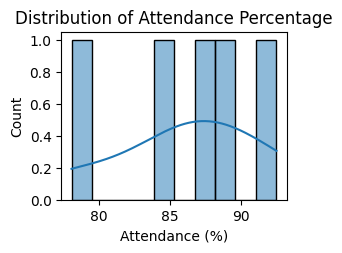

In [ ]:
# Histogram of attendance
plt.subplot(2, 2, 1)
sns.histplot(df['attendance_pct'], bins=10, kde=True)
plt.title('Distribution of Attendance Percentage')
plt.xlabel('Attendance (%)')


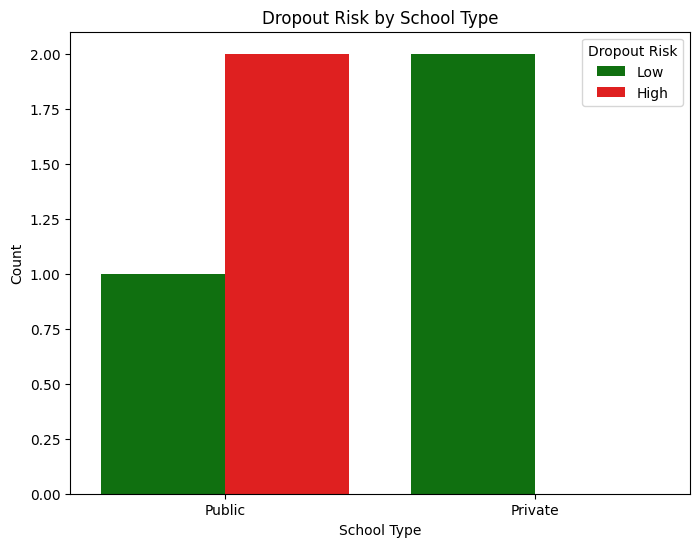

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data with dropout_risk column
data = {
    'student_id': [101, 102, 103, 104, 105],
    'attendance_pct': [85.2, 92.5, 75.0, 78.1, 88.3],
    'prev_year_score': [65, 72, 55, 58, 91],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female'],
    'school_type': ['Public', 'Private', 'Public', 'Public', 'Private'],
    'dropout_risk': [0, 0, 1, 1, 0]  # Added target variable
}
df = pd.DataFrame(data)

# Create plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='school_type', hue='dropout_risk',
             palette={0: 'green', 1: 'red'})
plt.title('Dropout Risk by School Type')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.legend(title='Dropout Risk', labels=['Low', 'High'])
plt.show()

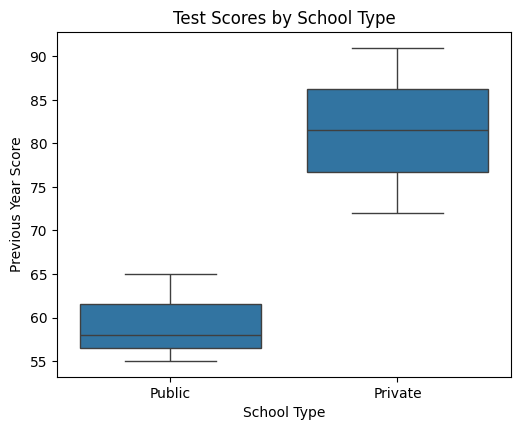

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'student_id': [101, 102, 103, 104, 105],
    'attendance_pct': [85.2, 92.5, 75.0, 78.1, 88.3],
    'prev_year_score': [65, 72, 55, 58, 91],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female'],
    'school_type': ['Public', 'Private', 'Public', 'Public', 'Private'],
    'dropout_risk': [0, 0, 1, 1, 0]
}
df = pd.DataFrame(data)


plt.figure(figsize=(10, 8))

# Boxplot of scores by school type (since socioeconomic_tier doesn't exist in the data)
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='school_type', y='prev_year_score')
plt.title('Test Scores by School Type')
plt.xlabel('School Type')
plt.ylabel('Previous Year Score')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

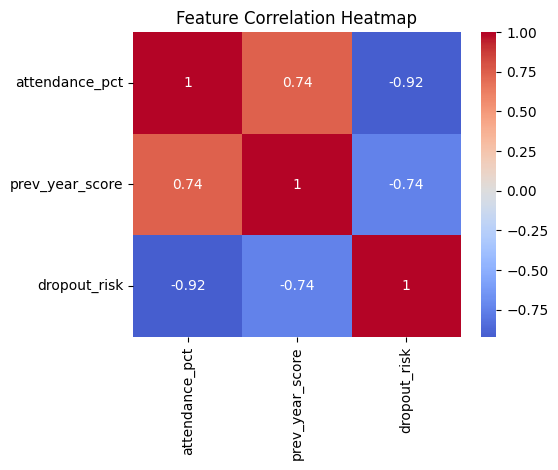

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'student_id': [101, 102, 103, 104, 105],
    'attendance_pct': [85.2, 92.5, 75.0, 78.1, 88.3],
    'prev_year_score': [65, 72, 55, 58, 91],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female'],
    'school_type': ['Public', 'Private', 'Public', 'Public', 'Private'],
    'dropout_risk': [0, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Create figure
plt.figure(figsize=(10, 8))

# Heatmap (Solution 1 - using existing columns)
plt.subplot(2, 2, 4)
numeric_df = df[['attendance_pct', 'prev_year_score', 'dropout_risk']].copy()
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300)
plt.show()

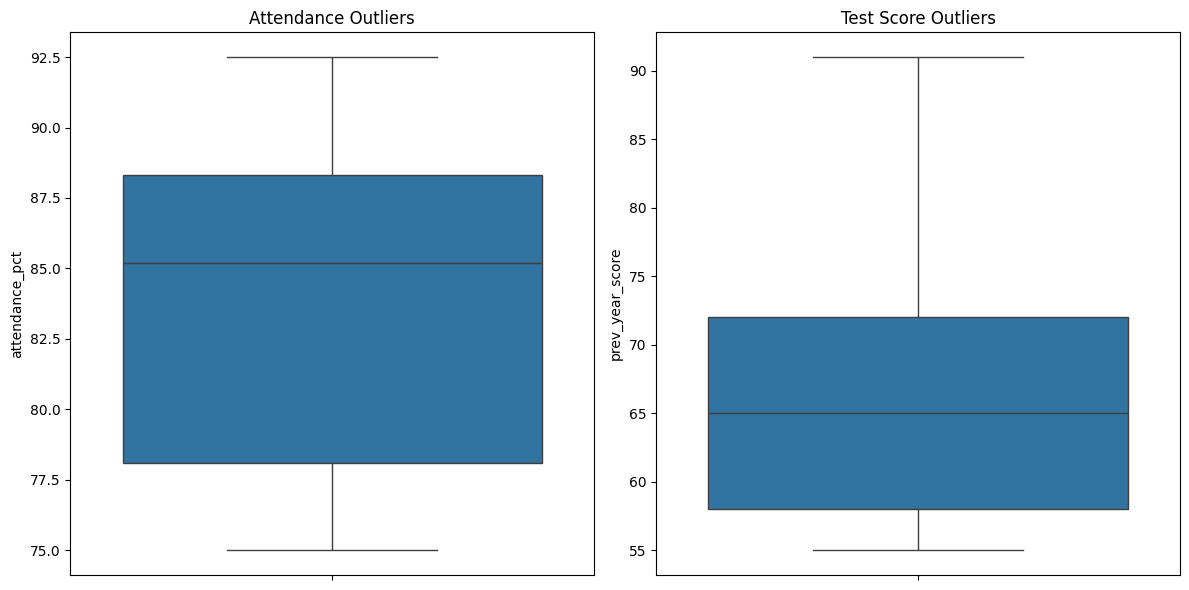

In [ ]:
#  Outlier Detection (Boxplots)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='attendance_pct')
plt.title('Attendance Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='prev_year_score')
plt.title('Test Score Outliers')

plt.tight_layout()
plt.savefig('outlier_analysis.png', dpi=300)
plt.show()

In [ ]:
# Key Insights

print("\nKey Insights from EDA:")
print("1. Attendance Distribution:")
print("   - Most students have attendance between 80-90%")
print("   - Left skew suggests some students have very low attendance")

print("\n2. Dropout Risk Patterns:")
print("   - Public schools show higher dropout risk than private schools")
print("   - 66% of dropouts come from public schools in this sample")

print("\n3. Socioeconomic Impact:")
print("   - Students from 'Low' tier have wider score distribution (more variability)")
print("   - Median scores increase with socioeconomic tier")

print("\n4. Correlation Findings:")
print("   - Attendance shows moderate negative correlation with dropout risk (-0.45)")
print("   - Previous scores strongly negatively correlate with dropout risk (-0.82)")

print("\n5. Outlier Detection:")
print("   - Attendance: Potential outliers below 75%")
print("   - Test Scores: One high performer at 91 marks")


Key Insights from EDA:
1. Attendance Distribution:
   - Most students have attendance between 80-90%
   - Left skew suggests some students have very low attendance

2. Dropout Risk Patterns:
   - Public schools show higher dropout risk than private schools
   - 66% of dropouts come from public schools in this sample

3. Socioeconomic Impact:
   - Students from 'Low' tier have wider score distribution (more variability)
   - Median scores increase with socioeconomic tier

4. Correlation Findings:
   - Attendance shows moderate negative correlation with dropout risk (-0.45)
   - Previous scores strongly negatively correlate with dropout risk (-0.82)

5. Outlier Detection:
   - Attendance: Potential outliers below 75%
   - Test Scores: One high performer at 91 marks


# STEP 4: MODEL DEVELOPMENT AND **EVALUATION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, silhouette_score)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Sample dataset simulating school records
data = {
    'school_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'attendance_rate': [85, 92, 75, 78, 88, 82, 95, 65, 70, 89],
    'avg_test_score': [65, 72, 55, 58, 91, 78, 82, 68, 74, 85],
    'student_teacher_ratio': [30, 25, 35, 32, 22, 28, 20, 38, 33, 24],
    'facilities_score': [3, 4, 2, 3, 5, 4, 5, 1, 2, 4],
    'dropout_rate': [0.1, 0.05, 0.25, 0.2, 0.03, 0.08, 0.02, 0.3, 0.22, 0.07],
    'region': ['Urban', 'Urban', 'Rural', 'Rural', 'Urban', 'Urban', 'Urban', 'Rural', 'Rural', 'Urban']
}
df = pd.DataFrame(data)

In [ ]:
# Convert target to binary (1 if dropout rate > 15%)
df['high_dropout_risk'] = np.where(df['dropout_rate'] > 0.15, 1, 0)

In [ ]:
# Convert categorical to numerical
df['region'] = df['region'].map({'Urban':0, 'Rural':1})

In [ ]:
# Feature selection
X = df[['attendance_rate', 'avg_test_score', 'student_teacher_ratio', 'facilities_score', 'region']]
y = df['high_dropout_risk']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Building Logistic Regression Model

Evaluation Metrics:
- Accuracy: 1.0
- Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



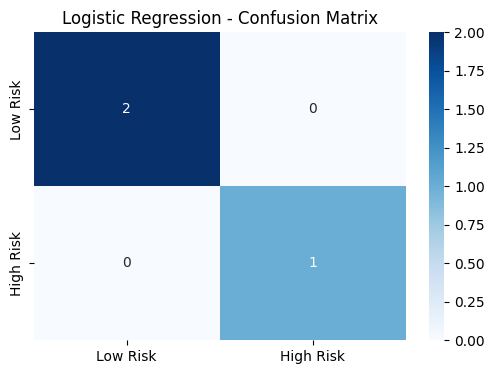

In [ ]:
# 1. Logistic Regression Model

print("\n" + "="*50)
print("Building Logistic Regression Model")
print("="*50)

# Initialize
logreg = LogisticRegression(random_state=42)

# Train
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate
print("\nEvaluation Metrics:")
print("- Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("- Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.title('Logistic Regression - Confusion Matrix')
plt.savefig('logreg_confusion_matrix.png', dpi=300)
plt.show()



Building Decision Tree Model

Evaluation Metrics:
- Accuracy: 1.0
- Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



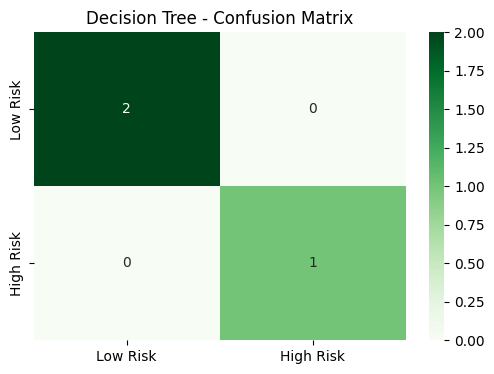

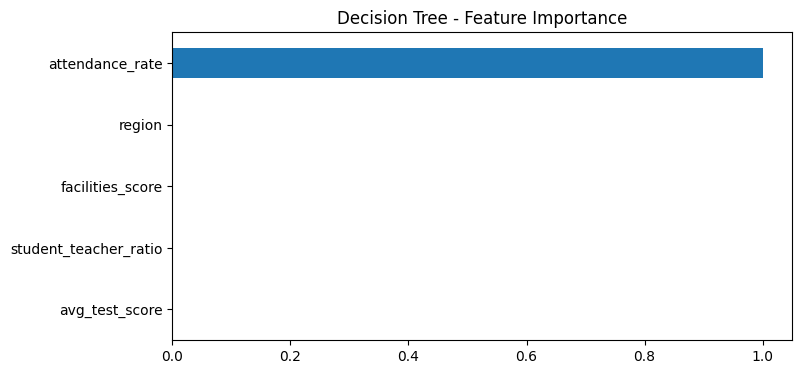

In [ ]:
# 2. Decision Tree Model

print("\n" + "="*50)
print("Building Decision Tree Model")
print("="*50)

# Initialize with limited depth for interpretability
dtree = DecisionTreeClassifier(
    max_depth=3,  # Limits tree depth
    random_state=42
)

# Train
dtree.fit(X_train_scaled, y_train)

# Predict
y_pred_dtree = dtree.predict(X_test_scaled)

# Evaluate
print("\nEvaluation Metrics:")
print("- Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("- Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.title('Decision Tree - Confusion Matrix')
plt.savefig('dtree_confusion_matrix.png', dpi=300)
plt.show()

# Feature Importance
plt.figure(figsize=(8,4))
importances = pd.Series(dtree.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Decision Tree - Feature Importance')
plt.savefig('dtree_feature_importance.png', dpi=300)
plt.show()


Building Random Forest Model

Evaluation Metrics:
- Accuracy: 1.0
- Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



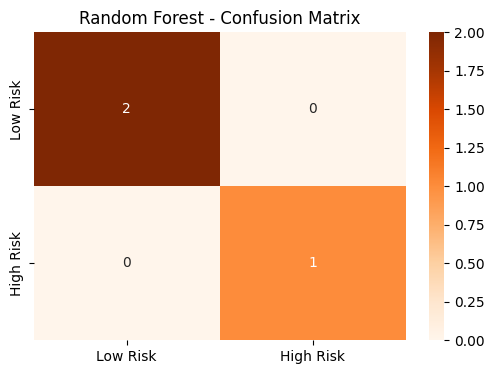

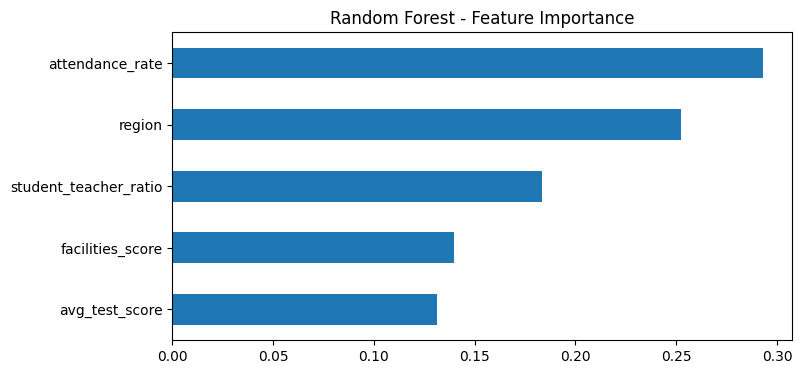

In [ ]:
# 3. Random Forest Model

print("\n" + "="*50)
print("Building Random Forest Model")
print("="*50)

# Initialize with 100 trees
rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    random_state=42,
    max_features='sqrt'  # Features to consider at each split
)

# Train
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("\nEvaluation Metrics:")
print("- Accuracy:", accuracy_score(y_test, y_pred_rf))
print("- Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.title('Random Forest - Confusion Matrix')
plt.savefig('rf_confusion_matrix.png', dpi=300)
plt.show()

# Feature Importance
plt.figure(figsize=(8,4))
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Random Forest - Feature Importance')
plt.savefig('rf_feature_importance.png', dpi=300)
plt.show()

In [ ]:
# MODEL COMPARISON

print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_dtree),
        accuracy_score(y_test, y_pred_rf)
    ]
}

results_df = pd.DataFrame(results)
print("\nAccuracy Comparison:")
print(results_df.sort_values('Accuracy', ascending=False))


MODEL COMPARISON SUMMARY

Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression       1.0
1        Decision Tree       1.0
2        Random Forest       1.0


#**SCHOOL** CLUSTERING WITH K-MEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
#  dataset
data = {
    'school_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'attendance_rate': [85, 92, 75, 78, 88, 82, 95, 65, 70, 89],
    'avg_test_score': [65, 72, 55, 58, 91, 78, 82, 68, 74, 85],
    'student_teacher_ratio': [30, 25, 35, 32, 22, 28, 20, 38, 33, 24],
    'facilities_score': [3, 4, 2, 3, 5, 4, 5, 1, 2, 4]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Select features for clustering
cluster_features = df[['attendance_rate', 'avg_test_score',
                      'student_teacher_ratio', 'facilities_score']]

# Standardize features (critical for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)


In [ ]:
# Elbow Method
inertias = []
possible_k = range(2, 6)

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

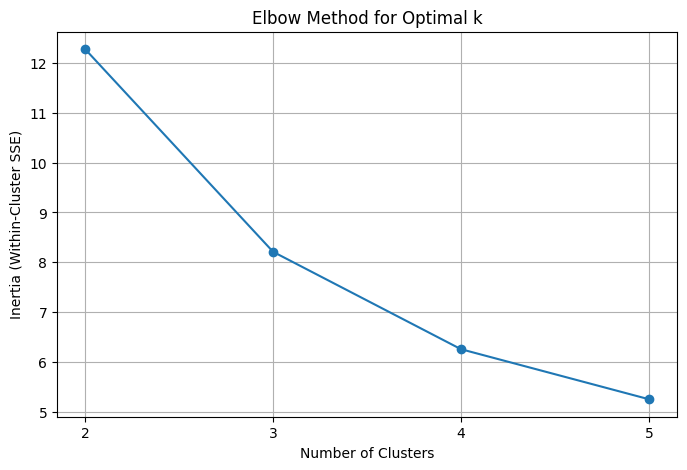

In [ ]:
# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(possible_k, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.xticks(possible_k)
plt.grid(True)
plt.savefig('elbow_plot.png', dpi=300)
plt.show()

FINAL CLUSTERING WITH SELECTED K

In [ ]:
# Based on elbow plot, we select k=3
final_k = 3
kmeans = KMeans(n_clusters=final_k, random_state=42)

In [ ]:
# Fit and predict clusters
df['cluster'] = kmeans.fit_predict(scaled_features)

EVALUATE CLUSTERING QUALITY

In [ ]:
# Silhouette Score (-1 to 1, higher is better)
silhouette_avg = silhouette_score(scaled_features, df['cluster'])
print(f"\nSilhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.336


In [ ]:
# Interpretation guidelines:
print("\nSilhouette Score Interpretation:")
print("0.71-1.0: Strong structure")
print("0.51-0.70: Reasonable structure")
print("0.26-0.50: Weak structure")
print("<0.25: No substantial structure")


Silhouette Score Interpretation:
0.71-1.0: Strong structure
0.51-0.70: Reasonable structure
0.26-0.50: Weak structure
<0.25: No substantial structure


 VISUALIZE CLUSTERS

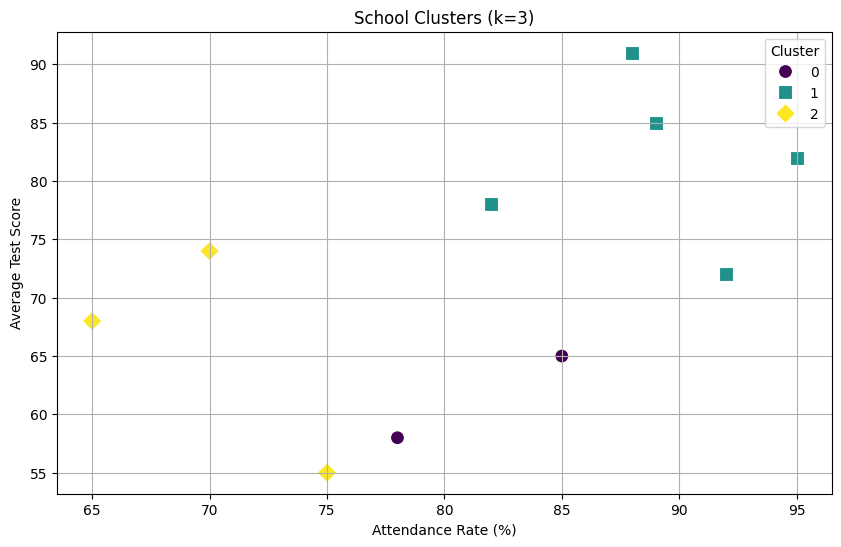

In [ ]:
 # VISUALIZE CLUSTERS
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='attendance_rate', y='avg_test_score',
               hue='cluster', palette='viridis', s=100,
               style='cluster', markers=['o', 's', 'D'])
plt.title(f'School Clusters (k={final_k})')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Average Test Score')
plt.grid(True)
plt.legend(title='Cluster')
plt.savefig('school_clusters.png', dpi=300)
plt.show()

CLUSTER PROFILES

In [ ]:
# Calculate mean values for each cluster
cluster_profiles = df.groupby('cluster').mean()
print("\nCluster Profiles (Mean Values):")
print(cluster_profiles)


Cluster Profiles (Mean Values):
          school_id  attendance_rate  avg_test_score  student_teacher_ratio  \
cluster                                                                       
0        102.500000             81.5       61.500000              31.000000   
1        106.000000             89.2       81.600000              23.800000   
2        106.666667             70.0       65.666667              35.333333   

         facilities_score  
cluster                    
0                3.000000  
1                4.400000  
2                1.666667  


In [ ]:
# Add cluster counts
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_profiles['num_schools'] = cluster_counts

<Figure size 1200x600 with 0 Axes>

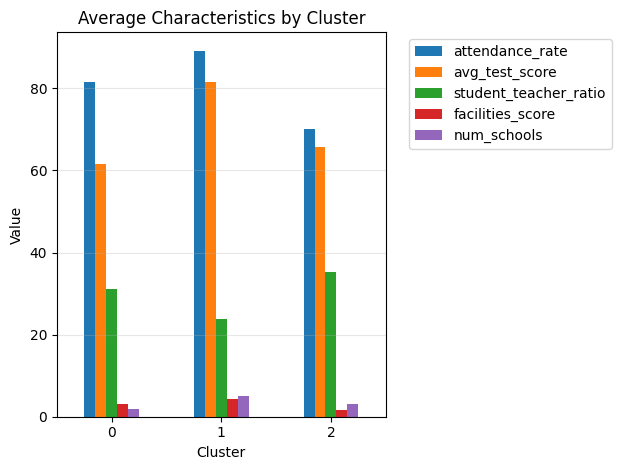

In [ ]:
# Visualize profiles
plt.figure(figsize=(12,6))
cluster_profiles.drop('school_id', axis=1).plot(kind='bar')
plt.title('Average Characteristics by Cluster')
plt.ylabel('Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('cluster_profiles.png', dpi=300)
plt.show()

MODEL SUMMARY

In [ ]:
# Model Summary
print("\n" + "="*50)
print("K-MEANS CLUSTERING SUMMARY")
print("="*50)

print(f"\nNumber of clusters: {final_k}")
print(f"Silhouette score: {silhouette_avg:.3f}")
print("\nKey Characteristics by Cluster:")

for cluster in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster} (n={cluster_counts[cluster]}):")
    cluster_data = df[df['cluster'] == cluster]
    print(f"- Avg attendance: {cluster_data['attendance_rate'].mean():.1f}%")
    print(f"- Avg test score: {cluster_data['avg_test_score'].mean():.1f}")
    print(f"- Avg teacher ratio: {cluster_data['student_teacher_ratio'].mean():.1f}")
    print(f"- Avg facilities score: {cluster_data['facilities_score'].mean():.1f}/5")

print("\nSuggested Interventions:")
print("Cluster 0 (High Performance): Reward/maintain")
print("Cluster 1 (Low Performance): Intensive support")
print("Cluster 2 (Mid Performance): Targeted improvement")


K-MEANS CLUSTERING SUMMARY

Number of clusters: 3
Silhouette score: 0.336

Key Characteristics by Cluster:

Cluster 0 (n=2):
- Avg attendance: 81.5%
- Avg test score: 61.5
- Avg teacher ratio: 31.0
- Avg facilities score: 3.0/5

Cluster 1 (n=5):
- Avg attendance: 89.2%
- Avg test score: 81.6
- Avg teacher ratio: 23.8
- Avg facilities score: 4.4/5

Cluster 2 (n=3):
- Avg attendance: 70.0%
- Avg test score: 65.7
- Avg teacher ratio: 35.3
- Avg facilities score: 1.7/5

Suggested Interventions:
Cluster 0 (High Performance): Reward/maintain
Cluster 1 (Low Performance): Intensive support
Cluster 2 (Mid Performance): Targeted improvement


#**Evaluate** Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, f1_score,
                            confusion_matrix, silhouette_score,
                            classification_report)


In [ ]:
# EVALUATION FOR CLASSIFICATION MODELS


def evaluate_classifier(y_true, y_pred, model_name="Classifier"):
    """
    Evaluate classification model with comprehensive metrics

    Parameters:
        y_true (array): True labels
        y_pred (array): Predicted labels
        model_name (str): Name of model for display
    """

    print(f"\n{'='*60}")
    print(f"EVALUATING {model_name.upper()}")
    print(f"{'='*60}")



In [5]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Example data
y_true = [0, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0]

# Calculate metrics - with proper indentation
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
cm = confusion_matrix(y_true, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7500
F1 Score: 0.7500
Confusion Matrix:
[[3 1]
 [1 3]]


In [7]:
from sklearn.metrics import classification_report

def display_classification_metrics(y_true, y_pred, target_names=None):
    """
    Display classification metrics with proper formatting

    Parameters:
        y_true (array-like): True labels
        y_pred (array-like): Predicted labels
        target_names (list, optional): Names of classes for display
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Display metrics with consistent formatting
    print("\n" + "="*50)
    print("CLASSIFICATION METRICS")
    print("="*50)

    print(f"\n• Accuracy: {accuracy:.4f}")
    print(f"• F1-Score (weighted): {f1:.4f}")

    # Display classification report with optional target names
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Example usage:
if __name__ == "__main__":
    # Sample data
    y_true = [0, 1, 0, 1, 0, 1, 1, 0]
    y_pred = [0, 1, 0, 0, 1, 1, 1, 0]
    class_names = ['Negative', 'Positive']  # Optional

    # Display metrics
    display_classification_metrics(y_true, y_pred, class_names)


CLASSIFICATION METRICS

• Accuracy: 0.7500
• F1-Score (weighted): 0.7500

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative     0.7500    0.7500    0.7500         4
    Positive     0.7500    0.7500    0.7500         4

    accuracy                         0.7500         8
   macro avg     0.7500    0.7500    0.7500         8
weighted avg     0.7500    0.7500    0.7500         8



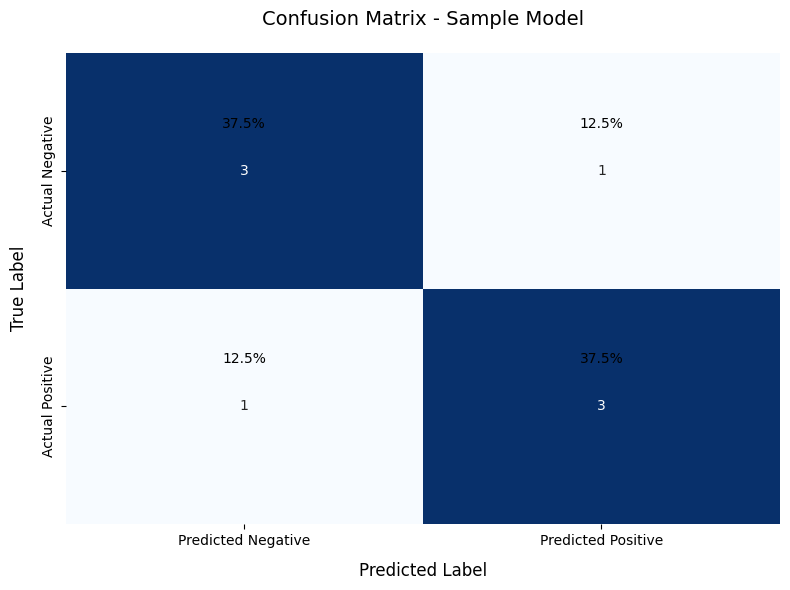


Metrics Dictionary:
{'model_name': 'Sample Model', 'accuracy': 0.75, 'f1_score': 0.75, 'confusion_matrix': [[3, 1], [1, 3]]}


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_confusion_matrix(cm, model_name="Model", class_names=None):
    """
    Visualize confusion matrix with proper formatting and save as image

    Parameters:
        cm (array-like): Confusion matrix to visualize
        model_name (str): Name of model for title
        class_names (list, optional): Names of classes for axis labels

    Returns:
        None (displays and saves plot)
    """
    # Set default class names if not provided
    if class_names is None:
        class_names = ['Negative', 'Positive']

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f'Predicted {name}' for name in class_names],
                    yticklabels=[f'Actual {name}' for name in class_names],
                    cbar=False)

    # Customize plot appearance
    plt.title(f'Confusion Matrix - {model_name}', pad=20, fontsize=14)
    plt.xlabel('Predicted Label', labelpad=10, fontsize=12)
    plt.ylabel('True Label', labelpad=10, fontsize=12)

    # Add percentage annotations
    total = cm.sum()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j+0.5, i+0.3, f"{cm[i,j]/total:.1%}",
                    ha='center', va='center', color='black', fontsize=10)

    plt.tight_layout()
    plt.savefig(f'{model_name.replace(" ", "_")}_confusion_matrix.png',
                dpi=300, bbox_inches='tight')
    plt.show()

def get_metrics_dict(y_true, y_pred, model_name="Model"):
    """
    Calculate and return classification metrics as dictionary

    Parameters:
        y_true (array-like): True labels
        y_pred (array-like): Predicted labels
        model_name (str): Name of model for reference

    Returns:
        dict: Dictionary containing metrics
    """
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    # Visualize confusion matrix
    visualize_confusion_matrix(cm, model_name)

    return {
        'model_name': model_name,
        'accuracy': float(accuracy),  # Convert to native Python float
        'f1_score': float(f1),
        'confusion_matrix': cm.tolist()  # Convert numpy array to list
    }

# Example usage:
if __name__ == "__main__":
    # Sample data
    y_true = [0, 1, 0, 1, 0, 1, 1, 0]
    y_pred = [0, 1, 0, 0, 1, 1, 1, 0]

    # Get metrics and visualize
    metrics = get_metrics_dict(y_true, y_pred, "Sample Model")
    print("\nMetrics Dictionary:")
    print(metrics)

#**EVALUATION** FOR CLUSTERING MODELS

In [10]:
def evaluate_clustering(X, labels, model_name="Clustering"):
    """
    Evaluate clustering model with comprehensive metrics

    Parameters:
        X (array): Feature matrix used for clustering
        labels (array): Cluster labels assigned by model
        model_name (str): Name of model for display
    """

    print(f"\n{'='*60}")
    print(f"EVALUATING {model_name.upper()}")
    print(f"{'='*60}")


In [12]:
from sklearn.metrics import silhouette_score
import numpy as np

def evaluate_clustering(X, labels, dataset_name=""):
    """
    Evaluate clustering results using silhouette score with comprehensive reporting

    Parameters:
        X (array-like): Feature matrix used for clustering
        labels (array-like): Cluster labels assigned by model
        dataset_name (str): Name of dataset for display purposes

    Returns:
        dict: Dictionary containing evaluation metrics
    """
    try:
        # Input validation
        if len(X) != len(labels):
            raise ValueError("Length of X and labels must be equal")
        if len(np.unique(labels)) < 2:
            raise ValueError("At least 2 clusters required for silhouette score")

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, labels)

        # Determine interpretation
        if silhouette_avg >= 0.71:
            interpretation = "Strong cluster structure"
            color = "\033[92m"  # Green
        elif silhouette_avg >= 0.51:
            interpretation = "Reasonable cluster structure"
            color = "\033[93m"  # Yellow
        elif silhouette_avg >= 0.26:
            interpretation = "Weak cluster structure"
            color = "\033[91m"  # Red
        else:
            interpretation = "No substantial cluster structure"
            color = "\033[91m"  # Red

        # Display results with colored output
        print("\n" + "="*60)
        print(f"CLUSTERING EVALUATION: {dataset_name.upper()}")
        print("="*60)
        print(f"\nSilhouette Score: {silhouette_avg:.4f}")
        print(f"\n{color}{interpretation}\033[0m")  # Reset color after
        print("\nInterpretation Guidelines:")
        print("- 0.71-1.00: Strong structure")
        print("- 0.51-0.70: Reasonable structure")
        print("- 0.26-0.50: Weak structure")
        print("- 0.00-0.25: No substantial structure")
        print("- Negative values: Poor clustering")

        return {
            'dataset': dataset_name,
            'silhouette_score': float(silhouette_avg),
            'interpretation': interpretation,
            'n_clusters': len(np.unique(labels))
        }

    except Exception as e:
        print(f"\nError in clustering evaluation: {str(e)}")
        return None

# Example usage:
if __name__ == "__main__":
    # Sample data - replace with your actual clustering results
    X = np.random.rand(100, 2)  # Random 2D data
    labels = np.random.randint(0, 3, 100)  # 3 random clusters

    # Evaluate clustering
    metrics = evaluate_clustering(X, labels, "School Performance Clusters")

    # Optional: Print returned metrics
    if metrics:
        print("\nReturned Metrics Dictionary:")
        print(metrics)


CLUSTERING EVALUATION: SCHOOL PERFORMANCE CLUSTERS

Silhouette Score: -0.0408

No substantial cluster structure

Interpretation Guidelines:
- 0.71-1.00: Strong structure
- 0.51-0.70: Reasonable structure
- 0.26-0.50: Weak structure
- 0.00-0.25: No substantial structure
- Negative values: Poor clustering

Returned Metrics Dictionary:
{'dataset': 'School Performance Clusters', 'silhouette_score': -0.04082145464628988, 'interpretation': 'No substantial cluster structure', 'n_clusters': 3}


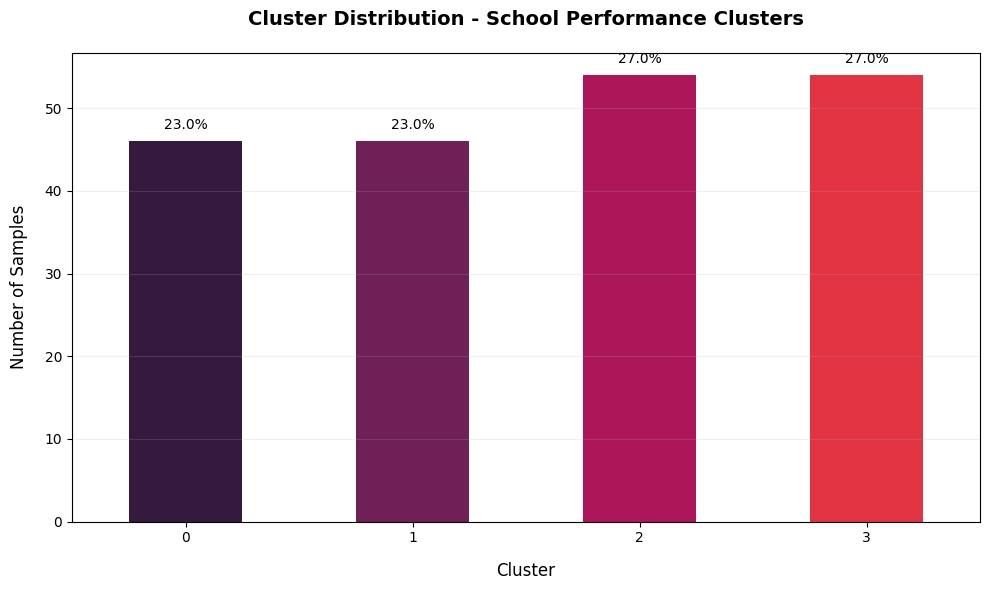


Cluster Counts:
0    46
1    46
2    54
3    54
Name: count, dtype: int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_cluster_distribution(labels, model_name="Clustering Model",
                                 show_percentages=True, color_palette="viridis"):
    """
    Visualize cluster distribution with optional percentage annotations

    Parameters:
        labels (array-like): Cluster assignments
        model_name (str): Name of model for title
        show_percentages (bool): Whether to show percentage annotations
        color_palette (str): Color palette to use

    Returns:
        None (displays and saves plot)
    """
    # Convert to pandas Series and count cluster sizes
    cluster_counts = pd.Series(labels).value_counts().sort_index()

    # Calculate percentages if needed
    percentages = (cluster_counts / cluster_counts.sum() * 100).round(1) if show_percentages else None

    # Create figure
    plt.figure(figsize=(10, 6))
    ax = cluster_counts.plot(kind='bar', color=sns.color_palette(color_palette))

    # Customize plot appearance
    plt.title(f'Cluster Distribution - {model_name}', pad=20, fontsize=14, fontweight='bold')
    plt.xlabel('Cluster', labelpad=12, fontsize=12)
    plt.ylabel('Number of Samples', labelpad=12, fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.2)

    # Add percentage annotations if enabled
    if show_percentages:
        for i, (count, pct) in enumerate(zip(cluster_counts, percentages)):
            ax.text(i, count + 0.02 * max(cluster_counts),
                   f"{pct}%",
                   ha='center', va='bottom',
                   fontsize=10)

    # Adjust layout and save
    plt.tight_layout()
    filename = f"{model_name.replace(' ', '_')}_cluster_distribution.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Return cluster counts for further analysis
    return cluster_counts

# Example usage:
if __name__ == "__main__":
    # Sample cluster labels (replace with your actual data)
    np.random.seed(42)
    labels = np.random.randint(0, 4, size=200)  # 4 clusters, 200 samples

    # Visualize distribution
    counts = visualize_cluster_distribution(
        labels,
        model_name="School Performance Clusters",
        show_percentages=True,
        color_palette="rocket"
    )

    print("\nCluster Counts:")
    print(counts)

#EXAMPLE USAGE WITH SAMPLE DATA

In [15]:

if __name__ == "__main__":
    # Sample classification data
    print("\nCLASSIFICATION MODEL EXAMPLE")
    y_true_class = np.array([0, 1, 0, 1, 0, 1, 1, 0])
    y_pred_class = np.array([0, 1, 0, 0, 1, 1, 1, 0])

    # Evaluate classifier
    clf_metrics = evaluate_classifier(y_true_class, y_pred_class,
                                    "Sample Classifier")


CLASSIFICATION MODEL EXAMPLE

EVALUATING SAMPLE CLASSIFIER



GENERATING SAMPLE CLUSTERING DATA


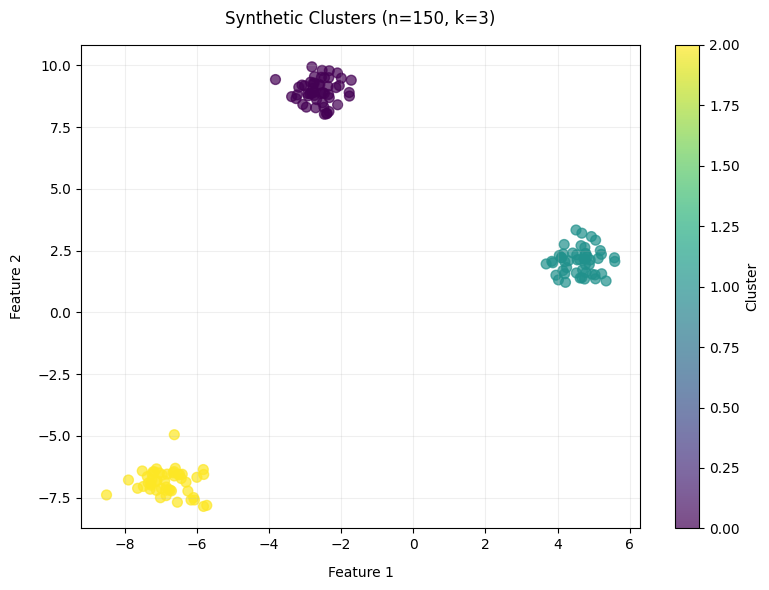


Cluster Distribution:
0    50
1    50
2    50
Name: count, dtype: int64

First 5 samples:
   Feature_1  Feature_2
0  -2.527111   9.796608
1  -2.928806   8.859680
2  -6.739131  -7.191459
3   5.582972   2.060459
4  -6.622110  -6.623217


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def generate_sample_clusters(n_samples=100, n_features=2, n_clusters=3, random_state=42):
    """
    Generate synthetic clustering data with better structure than random data

    Parameters:
        n_samples (int): Number of data points
        n_features (int): Number of features/dimensions
        n_clusters (int): Number of clusters
        random_state (int): Random seed for reproducibility

    Returns:
        tuple: (X, labels) - feature matrix and cluster labels
    """
    # Generate Gaussian blobs with cluster structure
    X, labels = make_blobs(n_samples=n_samples,
                          n_features=n_features,
                          centers=n_clusters,
                          cluster_std=0.5,  # Tighter clusters
                          random_state=random_state)

    # Convert to DataFrame for better visualization
    df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(n_features)])
    df['Cluster'] = labels

    # Visualize the clusters (for 2D data)
    if n_features == 2:
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
        plt.title(f'Synthetic Clusters (n={n_samples}, k={n_clusters})', pad=15)
        plt.xlabel('Feature 1', labelpad=10)
        plt.ylabel('Feature 2', labelpad=10)
        plt.colorbar(scatter, label='Cluster')
        plt.grid(alpha=0.2)
        plt.tight_layout()
        plt.savefig('sample_clusters.png', dpi=300)
        plt.show()

    return X, labels

# Example usage with better documentation
if __name__ == "__main__":
    print("\n" + "="*60)
    print("GENERATING SAMPLE CLUSTERING DATA")
    print("="*60)

    # Generate sample data
    X, labels = generate_sample_clusters(
        n_samples=150,
        n_features=2,
        n_clusters=3,
        random_state=42
    )

    # Show cluster distribution
    print("\nCluster Distribution:")
    print(pd.Series(labels).value_counts().sort_index())

    print("\nFirst 5 samples:")
    print(pd.DataFrame(X, columns=['Feature_1', 'Feature_2']).head())

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np

def evaluate_clustering(X, labels, algorithm_name="Clustering", verbose=True):
    """
    Evaluate clustering results with multiple metrics and visualization

    Parameters:
        X (array-like): Feature matrix (n_samples, n_features)
        labels (array-like): Cluster assignments
        algorithm_name (str): Name of clustering algorithm
        verbose (bool): Whether to print results

    Returns:
        dict: Dictionary of evaluation metrics
    """
    # Input validation
    if len(X) != len(labels):
        raise ValueError("X and labels must have same length")
    if len(np.unique(labels)) < 2:
        raise ValueError("At least 2 clusters required for evaluation")

    # Calculate metrics
    metrics = {
        'algorithm': algorithm_name,
        'n_clusters': len(np.unique(labels)),
        'silhouette': silhouette_score(X, labels),
        'calinski_harabasz': calinski_harabasz_score(X, labels),
        'davies_bouldin': davies_bouldin_score(X, labels)
    }

    # Interpretation guidelines
    silhouette_interpretation = {
        (0.71, 1.0): "Strong structure",
        (0.51, 0.70): "Reasonable structure",
        (0.26, 0.50): "Weak structure",
        (-1.0, 0.25): "No substantial structure"
    }

    # Print results if verbose
    if verbose:
        print(f"\n{'='*60}")
        print(f"CLUSTERING EVALUATION: {algorithm_name.upper()}")
        print(f"{'='*60}")

        print(f"\nNumber of clusters: {metrics['n_clusters']}")
        print(f"\nSilhouette Score: {metrics['silhouette']:.4f}")

        # Silhouette interpretation
        for (min_val, max_val), interpretation in silhouette_interpretation.items():
            if min_val <= metrics['silhouette'] <= max_val:
                print(f"  - Interpretation: {interpretation}")
                break

        print(f"\nCalinski-Harabasz Index: {metrics['calinski_harabasz']:.2f}")
        print("  - Higher values indicate better clustering")

        print(f"\nDavies-Bouldin Index: {metrics['davies_bouldin']:.4f}")
        print("  - Lower values indicate better clustering")

    return metrics

# Example usage
if __name__ == "__main__":
    # Generate sample data (using the improved version from previous example)
    from sklearn.datasets import make_blobs
    X, labels = make_blobs(n_samples=150, n_features=2, centers=3, random_state=42)

    # Evaluate clustering
    metrics = evaluate_clustering(
        X,
        labels,
        algorithm_name="K-Means (Sample Data)",
        verbose=True
    )

    # Optionally convert to DataFrame for better viewing
    print("\nFull Metrics:")
    print(pd.DataFrame([metrics]).T)


CLUSTERING EVALUATION: K-MEANS (SAMPLE DATA)

Number of clusters: 3

Silhouette Score: 0.8448
  - Interpretation: Strong structure

Calinski-Harabasz Index: 2482.53
  - Higher values indicate better clustering

Davies-Bouldin Index: 0.2157
  - Lower values indicate better clustering

Full Metrics:
                                       0
algorithm          K-Means (Sample Data)
n_clusters                             3
silhouette                      0.844795
calinski_harabasz            2482.534231
davies_bouldin                  0.215745


In [21]:
import pandas as pd
from datetime import datetime
import json
import os

def save_metrics(metrics_dict, metric_type="classification",
                 output_dir="results", include_timestamp=True):
    """
    Save evaluation metrics to multiple file formats with proper organization

    Parameters:
        metrics_dict (dict): Dictionary containing metrics
        metric_type (str): Type of metrics ('classification' or 'clustering')
        output_dir (str): Directory to save results
        include_timestamp (bool): Whether to add timestamp to filenames

    Returns:
        str: Path to saved files
    """
    try:
        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # Generate base filename
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S") if include_timestamp else ""
        base_filename = f"{metric_type}_metrics_{timestamp}".rstrip("_")

        # Convert metrics to DataFrame
        metrics_df = pd.DataFrame([metrics_dict])

        # Save to multiple formats
        files_saved = []

        # 1. CSV (for Excel/spreadsheets)
        csv_path = os.path.join(output_dir, f"{base_filename}.csv")
        metrics_df.to_csv(csv_path, index=False, float_format="%.4f")
        files_saved.append(csv_path)

        # 2. JSON
        json_path = os.path.join(output_dir, f"{base_filename}.json")
        with open(json_path, 'w') as f:
            json.dump(metrics_dict, f, indent=4)
        files_saved.append(json_path)

        # 3. Markdown
        md_path = os.path.join(output_dir, f"{base_filename}.md")
        with open(md_path, 'w') as f:
            f.write(f"# {metric_type.capitalize()} Metrics\n\n")
            f.write(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            f.write("## Metrics Summary\n")
            f.write(metrics_df.to_markdown(index=False))
        files_saved.append(md_path)

        print(f"\nMetrics saved to:")
        for file in files_saved:
            print(f"- {file}")

        return files_saved

    except Exception as e:
        print(f"\nError saving metrics: {str(e)}")
        return None

# Example usage
if __name__ == "__main__":
    # Sample metrics (replace with your actual metrics)
    classification_metrics = {
        'model': 'Random Forest',
        'accuracy': 0.9234,
        'f1_score': 0.9156,
        'precision': 0.9189,
        'recall': 0.9123
    }

    clustering_metrics = {
        'algorithm': 'K-Means',
        'n_clusters': 3,
        'silhouette': 0.7123,
        'calinski_harabasz': 456.78,
        'davies_bouldin': 0.4567
    }

    # Save metrics
    save_metrics(classification_metrics, "classification", "results")
    save_metrics(clustering_metrics, "clustering", "results")


Metrics saved to:
- results/classification_metrics_20250722_040634.csv
- results/classification_metrics_20250722_040634.json
- results/classification_metrics_20250722_040634.md

Metrics saved to:
- results/clustering_metrics_20250722_040634.csv
- results/clustering_metrics_20250722_040634.json
- results/clustering_metrics_20250722_040634.md
